# Final Project
## Data exploration
### James Fallon

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats
import glob
%pylab inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
files = glob.glob('./LC Data/LoanStats3[a-d].csv.zip')
files2 = glob.glob('./LC Data/LoanStats_2016Q[1-2].csv.zip')
files = files + files2

print 'IMPORT LOAN DATA\n'
print 'files being imported:\n' + str(files) +'\n'

#keep track of concatenation
i = 0

#start with the first file
data = pd.read_csv(files[0], header = 1, compression = 'zip')
print 'file ' + str(i) + ' complete'

#loop through remaining files
for file in files[1:len(files)]:
    
    data = pd.concat((data, pd.read_csv(file, header = 1, compression = 'zip')), axis = 0)
    
    #keep track of loading process
    i+=1
    print 'file ' + str(i) + ' complete'
    
    if i == len(files):
        print 'import complete'

#sense check shape, size etc. of dataset
np.shape(data)
variables = pd.DataFrame(data.columns.values)
data.index.values
data.head(n=5)

IMPORT LOAN DATA

files being imported:
['./LC Data/LoanStats3a.csv.zip', './LC Data/LoanStats3b.csv.zip', './LC Data/LoanStats3c.csv.zip', './LC Data/LoanStats3d.csv.zip', './LC Data/LoanStats_2016Q1.csv.zip', './LC Data/LoanStats_2016Q2.csv.zip']



/Users/Dwijo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file 0 complete


/Users/Dwijo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file 1 complete


/Users/Dwijo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file 2 complete


/Users/Dwijo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file 3 complete
file 4 complete
file 5 complete


(1119194, 111)

array([    0,     1,     2, ..., 97853, 97854, 97855])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#import declined loan data

files = ['./LC Data/RejectStatsB.csv.zip', 'LC Data/RejectStatsD.csv.zip']
files2 = glob.glob('./LC Data/RejectStats_2016Q[1-2].csv.zip')
files = files + files2

print 'IMPORT DECLINED LOAN DATA\n'
print 'files being imported:\n' + str(files) +'\n'

#keep track of concatenation
i = 0

#start with the first file
dec_data = pd.read_csv(files[0], header = 1, compression = 'zip')
print 'file ' + str(i) + ' complete'

#loop through remaining files
for file in files[1:len(files)]:
    
    dec_data = pd.concat((dec_data, pd.read_csv(file, header = 1, compression = 'zip')), axis = 0)
    
    #keep track of loading process
    i+=1
    print 'file ' + str(i) + ' complete'
    
    if i == len(files):
        print 'import complete'

#sense check shape, size etc. of dataset
np.shape(dec_data)
dec_variables = pd.DataFrame(dec_data.columns.values)
dec_data.index.values
dec_data.head(n=5)

IMPORT DECLINED LOAN DATA

files being imported:
['./LC Data/RejectStatsB.csv.zip', 'LC Data/RejectStatsD.csv.zip', './LC Data/RejectStats_2016Q1.csv.zip', './LC Data/RejectStats_2016Q2.csv.zip']

file 0 complete
file 1 complete
file 2 complete
file 3 complete


(7645772, 9)

array([     0,      1,      2, ..., 996359, 996360, 996361])

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,30000.0,2013-01-01,debt_consolidation,754.0,32.01%,559xx,MN,< 1 year,0.0
1,15000.0,2013-01-01,medical,728.0,27.01%,945xx,CA,< 1 year,0.0
2,2500.0,2013-01-01,other,723.0,0.92%,190xx,PA,7 years,0.0
3,4000.0,2013-01-01,car,563.0,24.92%,296xx,SC,< 1 year,0.0
4,22000.0,2013-01-01,debt_consolidation,0.0,26.91%,735xx,OK,< 1 year,0.0


In [4]:
#creating a small 1% sample for running code with

# np.random.seed(1)
# temp = np.random.rand((data)) <= 0.01
data = data.sample(frac=0.05, replace=True)


In [69]:
##quick frequency table to see variables for mapping of loan status
counts = data['loan_status'].value_counts()

counts


1    34493
2    17217
0     4250
Name: loan_status, dtype: int64

In [43]:
##categorizing different statuses
data['loan_status'].replace(to_replace = ["Fully Paid", "Charged Off", "Default", "Late (31-120 days)", "Current", 
           "In Grace Period",
          "Late (16-30 days)",
          "Does not meet the credit policy. Status:Fully Paid",
           "Does not meet the credit policy. Status:Charged Off"], value = [2,0,0,1,1,1,1,2,0], inplace=True)

##generating new frequency table
counts_status = data['loan_status'].value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [58]:
##generating new frequency table
counts_status = data['loan_status'].value_counts()

total_status = counts_status[0] + counts_status[1] + counts_status[2]

##creating percentage distribution for pie chart
default_percent = (float(counts_status[0])/total_status)*100
active_percent = (float(counts_status[1])/total_status)*100
paid_percent = (float(counts_status[2])/total_status)*100

4250

55960

7.5947105075053605

61.638670478913504

30.76661901358113

([<matplotlib.patches.Wedge at 0x1238e7910>,
  <matplotlib.text.Text at 0x123d60610>])

(-1.0971671018955274,
 1.0098620989875449,
 -1.0124280948993121,
 1.0122254885883144)

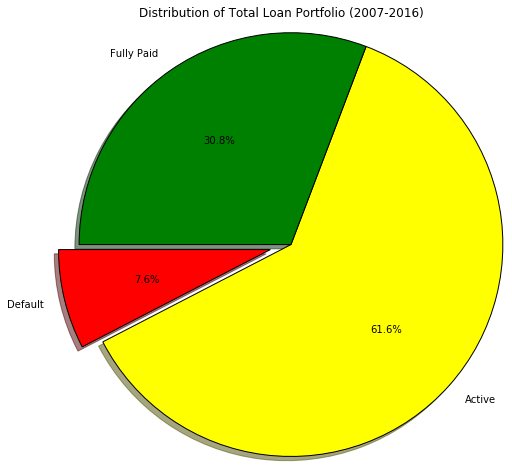

In [118]:
##creating pie chart for loan status

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

labels = ['Default', 'Active', 'Fully Paid']
sizes = [default_percent, active_percent, paid_percent]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)

ax.pie(sizes, explode = explode, labels=labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=180)

ax.set_title("Distribution of Total Loan Portfolio (2007-2016)")
ax.axis('equal')
plt.figure()
plt.savefig('Loan_Status.png')

In [121]:
##quick frequency table to see variables for mapping of loan grades

grade_counts = data['grade'].value_counts()

grade_counts[2]

##calculating 
grade_counts

9717

B    16298
C    15519
A     9717
D     8200
E     4380
F     1475
G      371
Name: grade, dtype: int64

In [110]:
##creating columns with dummies for loan status
cat_names = {0:'Default', 1:'Active', 2:'Repaid'}
for elem in data['loan_status'].unique():
    data[cat_names[elem]] = data['loan_status'] == elem

##creating array with interest rates for each grade
data['int_rate'] = data['int_rate'].replace('%','',regex=True).astype('float')

grade_rate = data.groupby(['grade'], as_index=False)['int_rate'].mean()

##creating array with default rates for each grade
grade_default = data.groupby(['grade'], as_index=False)['Default'].mean()

grade_default['Default'] = grade_default['Default']*100

In [119]:
grade_default

grade_rate

,grade,Default
0,A,2.439024
1,B,4.773592
2,C,8.035312
3,D,12.024390
4,E,13.607306
5,F,20.881356
6,G,26.415094


,grade,int_rate
0,A,7.113119
1,B,10.657375
2,C,13.896859
3,D,17.275805
4,E,20.088320
5,F,23.849973
6,G,26.290404


Size of Bubble Represents Relative Size of Loan Grade in Portfolio


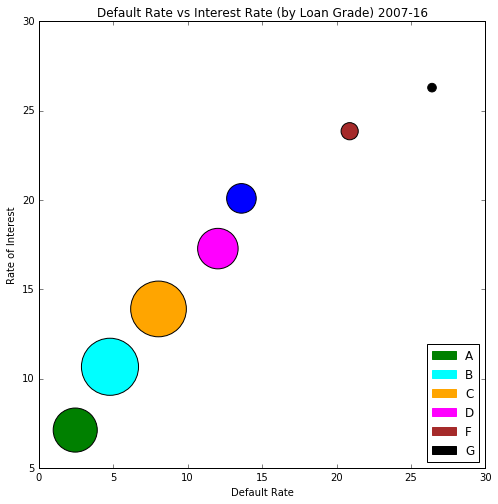

In [173]:
# prepare random data
x = [grade_default.iloc[0, 1], grade_default.iloc[1, 1], grade_default.iloc[2, 1], 
     grade_default.iloc[3, 1], grade_default.iloc[4, 1], grade_default.iloc[5, 1], grade_default.iloc[6, 1]]
y = [grade_rate.iloc[0, 1], grade_rate.iloc[1, 1], grade_rate.iloc[2, 1], 
     grade_rate.iloc[3, 1], grade_rate.iloc[4, 1], grade_rate.iloc[5, 1], grade_rate.iloc[6, 1]]
areas = [grade_counts[2]/5, 
         grade_counts[0]/5, 
         grade_counts[1]/5, 
         grade_counts[3]/5, 
         grade_counts[4]/5, 
         grade_counts[5]/5, 
         grade_counts[6]/5]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
colors = ['green', 'cyan', 'orange', 'magenta', 'blue', 'brown', 'black']

a = mpatches.Patch(color='green', label='A')
b = mpatches.Patch(color='cyan', label='B')
c = mpatches.Patch(color='orange', label='C')
d = mpatches.Patch(color='magenta', label='D')
e = mpatches.Patch(color='blue', label='E')
f = mpatches.Patch(color='brown', label='F')
g = mpatches.Patch(color='black', label='G')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(x, y, c=colors, s=areas)
ax.legend(loc='best')
ax.set_xlabel('Default Rate')
ax.set_ylabel('Rate of Interest')
ax.set_title('Default Rate vs Interest Rate (by Loan Grade) 2007-16')

plt.legend(handles=[a, b, c, d, f, g], loc='lower right')
print "Size of Bubble Represents Relative Size of Loan Grade in Portfolio"